In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="tanh", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
history = History()

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\Sou\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 1ms/step - loss: 1.3644 - val_loss: 1.3181
Epoch 2/20
363/363 [==============================] - 0s 807us/step - loss: 1.3437 - val_loss: 1.3216
Epoch 3/20
363/363 [==============================] - 0s 860us/step - loss: 1.3420 - val_loss: 1.3181
Epoch 4/20
363/363 [==============================] - 0s 771us/step - loss: 1.3424 - val_loss: 1.3213
Epoch 5/20
363/363 [==============================] - 0s 782us/step - loss: 1.3421 - val_loss: 1.3160
Epoch 6/20
363/363 [==============================] - 0s 767us/step - loss: 1.3426 - val_loss: 1.3189
Epoch 7/20
363/363 [==============================] - 0s 774us/step - loss: 1.3431 - val_loss: 1.3136
Epoch 8/20
363/363 [==============================] - 0s 783us/step - loss: 1.3422 - val_loss: 1.3157
Epoch 9/20
363/363 [==============================] - 0s 778us/step - loss: 1.3424 - val_loss: 1.3161
Epoch 10/20
363/363 [==============================] - 0s 784us/step - loss: 1.3409 - val_loss:

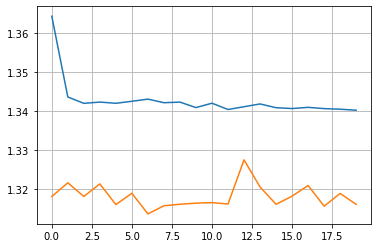

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [7]:
from sklearn.preprocessing import StandardScaler

history2 = History()


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

 

history2 = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32, epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7410 - val_loss: 0.5820
Epoch 2/20
363/363 [==============================] - 0s 895us/step - loss: 0.5370 - val_loss: 0.4949
Epoch 3/20
363/363 [==============================] - 0s 858us/step - loss: 0.5028 - val_loss: 0.4792
Epoch 4/20
363/363 [==============================] - 0s 852us/step - loss: 0.4897 - val_loss: 0.4699
Epoch 5/20
363/363 [==============================] - 0s 822us/step - loss: 0.4816 - val_loss: 0.4639
Epoch 6/20
363/363 [==============================] - 0s 829us/step - loss: 0.4763 - val_loss: 0.4603
Epoch 7/20
363/363 [==============================] - 0s 895us/step - loss: 0.4728 - val_loss: 0.4576
Epoch 8/20
363/363 [==============================] - 0s 819us/step - loss: 0.4704 - val_loss: 0.4556
Epoch 9/20
363/363 [==============================] - 0s 829us/step - loss: 0.4685 - val_loss: 0.4544
Epoch 10/20
363/363 [==============================] - 0s 900us/step - loss: 0.4670 

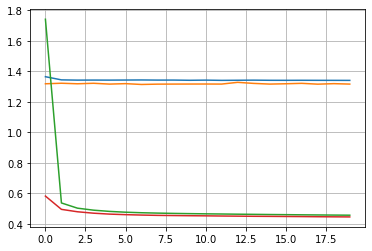

In [8]:
plt.plot(pd.DataFrame(history.history))
plt.plot(pd.DataFrame(history2.history))
plt.grid(True)
plt.show()

# Dane zawsze muszą być przeskalowane